<a href="https://colab.research.google.com/github/prabhaM07/intern/blob/main/Digit_recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import modules

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sn
import tensorflow as tf
from tensorflow import keras
%matplotlib inline

In [ ]:
# Load MNIST dataset
(X_train_all, y_train_all), (X_test, y_test) = keras.datasets.mnist.load_data()

total_samples = len(X_train_all)

train_samples = int(0.8 * total_samples)
test_samples = int(0.1 * total_samples)
val_samples = total_samples - train_samples - test_samples

# Split the data
X_train = X_train_all[:train_samples]
y_train = y_train_all[:train_samples]

X_val = X_train_all[train_samples:train_samples + val_samples]
y_val = y_train_all[train_samples:train_samples + val_samples]

X_test = X_train_all[train_samples + val_samples:]
y_test = y_train_all[train_samples + val_samples:]


11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train[0].shape

(28, 28)

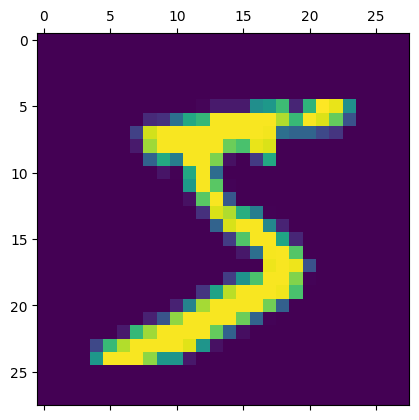

In [ ]:
plt.matshow(X_train[0])

In [ ]:
y_train[0]

5

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [ ]:
X_train_flattened.shape

(48000, 784)

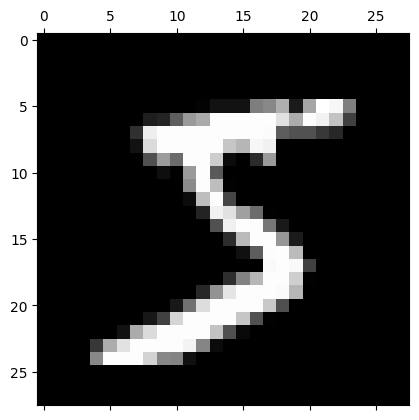

In [ ]:
plt.matshow(X_train[0],cmap='gray')

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

custom_adadelta_optimizer = keras.optimizers.Adadelta(learning_rate=1.0)
model.compile(optimizer=custom_adadelta_optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model.fit(X_train_flattened, y_train, epochs=10)

Epoch 1/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4972 - accuracy: 0.8699
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3281 - accuracy: 0.9081
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3061 - accuracy: 0.9146
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2948 - accuracy: 0.9175
Epoch 5/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2879 - accuracy: 0.9199
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2829 - accuracy: 0.9209
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2788 - accuracy: 0.9220
Epoch 8/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2758 - accuracy: 0.9237
Epoch 9/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2728 - accuracy: 0.9244
Epoch 10/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.271

In [ ]:
model.evaluate(X_test_flattened, y_test)

188/188 [==============================] - 1s 3ms/step - loss: 0.2292 - accuracy: 0.9375


[0.22915224730968475, 0.9375]

In [ ]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

188/188 [==============================] - 0s 2ms/step


array([7.5165922e-11, 1.5936549e-15, 1.7518971e-08, 4.4176794e-08,
       6.4258558e-09, 4.5234437e-06, 3.2261399e-10, 9.0948543e-14,
       3.4931401e-07, 7.0401690e-10], dtype=float32)

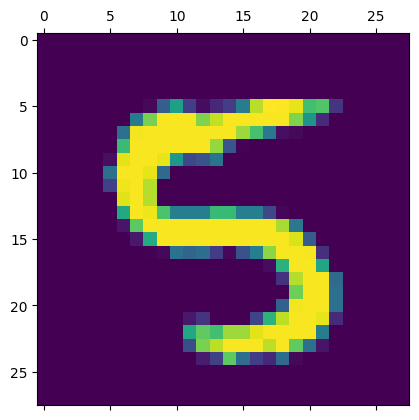

In [ ]:
plt.matshow(X_test[0])

In [ ]:
np.argmax(y_predicted[0])

5

In [ ]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [ ]:
y_predicted_labels[:5]

[5, 3, 0, 0, 0]

In [ ]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[569,   0,   3,   1,   2,   6,   2,   3,   1,   0],
       [  0, 618,   2,   2,   0,   2,   0,   0,   6,   0],
       [  5,   2, 559,   6,   6,   3,   3,   5,  11,   0],
       [  3,   1,  11, 579,   1,  20,   1,   1,   6,   4],
       [  2,   9,   0,   0, 573,   0,   3,   2,   1,   5],
       [  8,   1,   8,  22,   5, 481,  12,   1,   7,   4],
       [  2,   2,   4,   0,   3,   2, 557,   0,   1,   0],
       [  3,   2,   5,   4,   6,   0,   0, 638,   1,   9],
       [  2,  19,   6,  13,   1,  21,   1,   7, 517,  10],
       [  1,   2,   2,   9,  10,   4,   0,   9,   5, 534]], dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

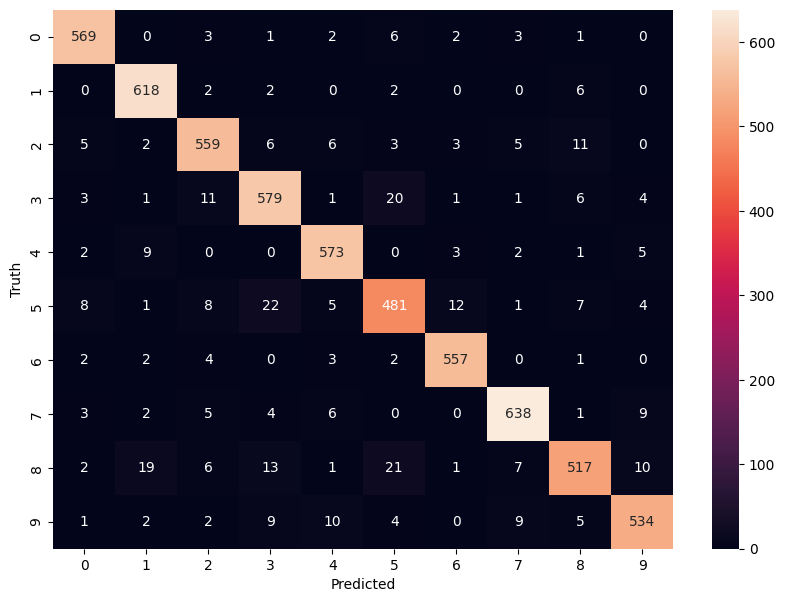

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
model = keras.Sequential([
   keras.layers.Dense(100, input_shape=(784,), activation=keras.layers.PReLU(alpha_initializer='zeros')),
    keras.layers.Dense(50,activation=keras.layers.PReLU(alpha_initializer='zeros')),
    keras.layers.Dense(25,activation=keras.layers.PReLU(alpha_initializer='zeros')),
    keras.layers.Dense(10, activation='softmax')
])

custom_adadelta_optimizer = keras.optimizers.Adadelta(learning_rate=1.0)
model.compile(optimizer=custom_adadelta_optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=10)

Epoch 1/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2847 - accuracy: 0.9134
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1200 - accuracy: 0.9646
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0850 - accuracy: 0.9748
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0663 - accuracy: 0.9802
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0529 - accuracy: 0.9839
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0428 - accuracy: 0.9872
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0341 - accuracy: 0.9898
Epoch 8/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0276 - accuracy: 0.9916
Epoch 9/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0224 - accuracy: 0.9933
Epoch 10/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.018

In [ ]:
model.evaluate(X_test_flattened,y_test)

188/188 [==============================] - 1s 4ms/step - loss: 0.0921 - accuracy: 0.9798


[0.09210491180419922, 0.9798333048820496]

188/188 [==============================] - 0s 2ms/step
tf.Tensor(
[[577   0   3   1   0   0   0   1   3   2]
 [  0 625   1   0   0   0   2   1   1   0]
 [  3   1 589   1   1   0   0   1   4   0]
 [  0   0   3 613   0   6   0   0   5   0]
 [  1   4   0   0 583   0   0   2   0   5]
 [  1   1   1   7   1 529   4   0   3   2]
 [  1   0   0   0   1   1 567   0   1   0]
 [  0   3   2   0   1   0   0 661   0   1]
 [  0   3   4   5   0   1   1   0 583   0]
 [  0   1   0   5   6   6   0   4   2 552]], shape=(10, 10), dtype=int32)


Text(95.72222222222221, 0.5, 'Truth')

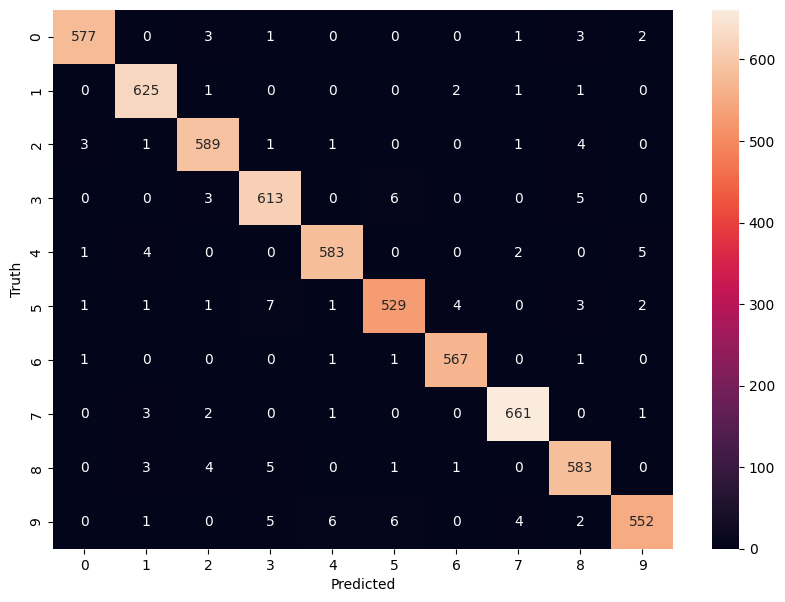

In [ ]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
print(cm)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation=keras.layers.PReLU(alpha_initializer='zeros')),
    keras.layers.Dense(50, activation=keras.layers.PReLU(alpha_initializer='zeros')),
    keras.layers.Dense(10, activation='sigmoid')
])

custom_adadelta_optimizer = keras.optimizers.Adadelta(learning_rate=1.0)
model.compile(optimizer=custom_adadelta_optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)


Epoch 1/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2796 - accuracy: 0.9174
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1212 - accuracy: 0.9637
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0840 - accuracy: 0.9744
Epoch 4/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0656 - accuracy: 0.9799
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0519 - accuracy: 0.9848
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0428 - accuracy: 0.9875
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0350 - accuracy: 0.9894
Epoch 8/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0273 - accuracy: 0.9920
Epoch 9/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0229 - accuracy: 0.9933
Epoch 10/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.018

In [ ]:
model.evaluate(X_test,y_test)

188/188 [==============================] - 1s 2ms/step - loss: 0.0949 - accuracy: 0.9792


[0.09491584450006485, 0.9791666865348816]

188/188 [==============================] - 0s 2ms/step
tf.Tensor(
[[581   0   2   0   0   0   0   1   1   2]
 [  0 626   1   0   0   0   2   0   1   0]
 [  2   1 594   1   1   1   0   0   0   0]
 [  2   0   5 609   0   5   0   1   4   1]
 [  0   4   0   0 588   0   0   2   0   1]
 [  1   0   2   8   1 527   6   1   2   1]
 [  2   0   2   0   1   0 565   0   1   0]
 [  0   2   0   2   4   0   0 658   0   2]
 [  2   2   2   2   3   3   0   1 579   3]
 [  1   2   0   3  13   4   0   5   0 548]], shape=(10, 10), dtype=int32)


Text(95.72222222222221, 0.5, 'Truth')

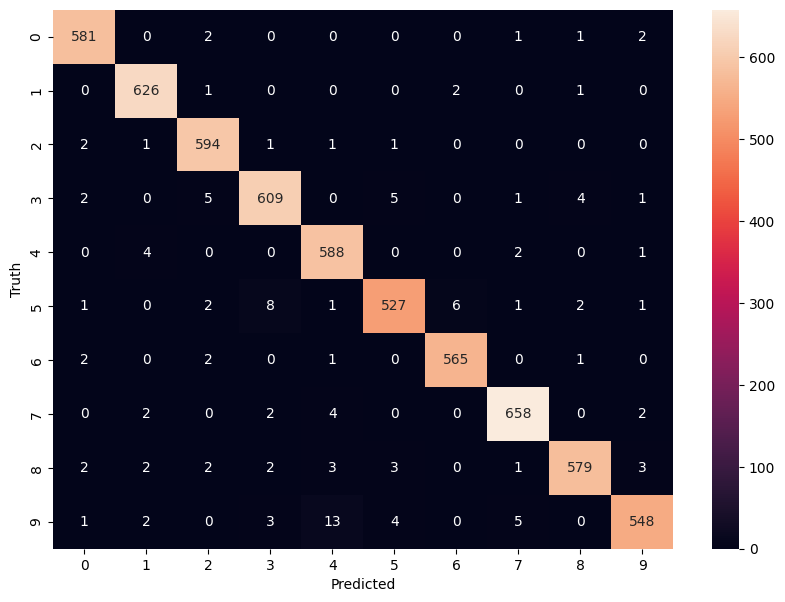

In [ ]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
print(cm)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 100)               78600     
                                                                 
 dense_6 (Dense)             (None, 50)                5100      
                                                                 
 dense_7 (Dense)             (None, 10)                510       
                                                                 
Total params: 84210 (328.95 KB)
Trainable params: 84210 (328.95 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Conv2D(64, kernel_size=(4, 4), activation='relu', input_shape=(28, 28, 1), padding='same'),
    keras.layers.MaxPooling2D(pool_size=(3, 3)),


    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),

    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(25, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

custom_adadelta_optimizer = keras.optimizers.Adadelta(learning_rate=1.0)

model.compile(optimizer=custom_adadelta_optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)


Epoch 1/10
1500/1500 [==============================] - 52s 34ms/step - loss: 0.2033 - accuracy: 0.9345
Epoch 2/10
1500/1500 [==============================] - 51s 34ms/step - loss: 0.0525 - accuracy: 0.9834
Epoch 3/10
1500/1500 [==============================] - 52s 34ms/step - loss: 0.0356 - accuracy: 0.9889
Epoch 4/10
1500/1500 [==============================] - 53s 35ms/step - loss: 0.0294 - accuracy: 0.9909
Epoch 5/10
1500/1500 [==============================] - 51s 34ms/step - loss: 0.0222 - accuracy: 0.9929
Epoch 6/10
1500/1500 [==============================] - 50s 33ms/step - loss: 0.0178 - accuracy: 0.9937
Epoch 7/10
1500/1500 [==============================] - 50s 33ms/step - loss: 0.0142 - accuracy: 0.9954
Epoch 8/10
1500/1500 [==============================] - 54s 36ms/step - loss: 0.0111 - accuracy: 0.9966
Epoch 9/10
1500/1500 [==============================] - 50s 33ms/step - loss: 0.0089 - accuracy: 0.9973
Epoch 10/10
1500/1500 [==============================] - 50s 33m

In [ ]:
model.evaluate(X_test,y_test)

188/188 [==============================] - 2s 10ms/step - loss: 0.0377 - accuracy: 0.9912


[0.03771073371171951, 0.9911666512489319]

188/188 [==============================] - 2s 9ms/step
tf.Tensor(
[[582   0   1   0   0   0   0   1   2   1]
 [  0 628   1   0   0   0   1   0   0   0]
 [  1   2 596   0   0   0   0   1   0   0]
 [  0   0   0 624   0   2   0   0   1   0]
 [  0   4   0   0 587   0   0   1   0   3]
 [  0   0   0   2   0 541   3   0   3   0]
 [  0   0   0   0   0   1 570   0   0   0]
 [  0   5   0   0   2   0   0 659   0   2]
 [  0   0   0   1   0   1   0   0 595   0]
 [  0   0   0   1   6   4   0   0   0 565]], shape=(10, 10), dtype=int32)


Text(95.72222222222221, 0.5, 'Truth')

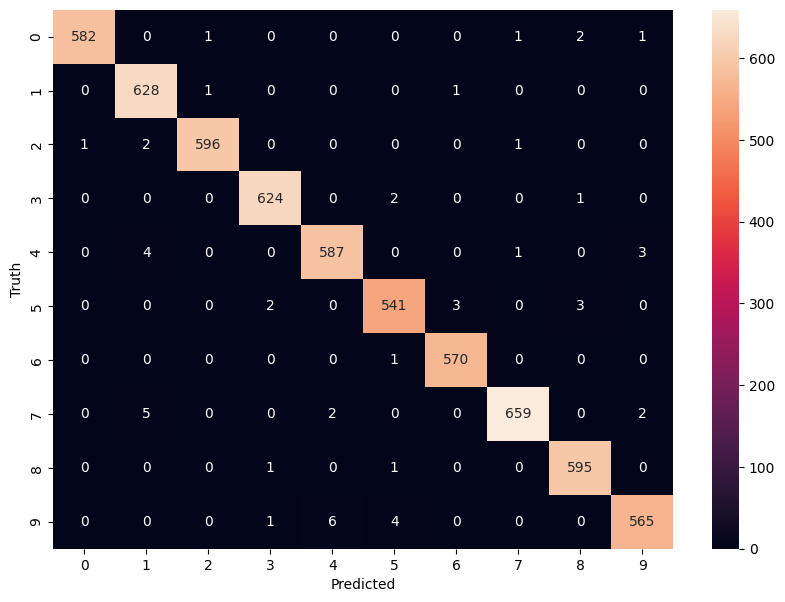

In [ ]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
print(cm)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        1088      
                                                                 
 max_pooling2d (MaxPooling2  (None, 9, 9, 64)          0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 32)          18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 32)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_8 (Dense)             (None, 100)              